In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('..\data\sentiment_analysis.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_1672\3765686874.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('..\data\sentiment_analysis.csv')


In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [5]:
data.shape # Chack the shape of the dataset

(7920, 3)

In [6]:
data.duplicated().sum()  # Check for duplicates

np.int64(0)

In [7]:
data.isnull().sum() # Check for missing values

id       0
label    0
tweet    0
dtype: int64

# Text Processing

In [8]:
import string
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [11]:
# Convert uppercase to lowercase
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
# Remove links
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
data['tweet'].head(10)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk  … #bay #amazon #...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [15]:
# Remove puncuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data['tweet'] = data['tweet'].apply(remove_punctuation)

In [17]:
data['tweet'].head(10)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
7    new type c charger cable uk  … bay amazon etsy...
8    bout to go shopping again listening to music i...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [18]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [19]:
# Remove numbers
data['tweet'] = data['tweet'].str.replace('\d+', " ", regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_1672\2701124351.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['tweet'] = data['tweet'].str.replace('\d+', " ", regex=True)


In [20]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely   year old neighbor with her...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [21]:
# Remove stopwords
import nltk
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [23]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [25]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [26]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [27]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [28]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [29]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Vocabulary Building

In [30]:
from collections import Counter
vocab = Counter()

In [31]:
vocab

Counter()

In [32]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [33]:
vocab

Counter({'iphon': 4169,
         'appl': 2876,
         'samsung': 1398,
         'new': 1137,
         'phone': 1015,
         'follow': 922,
         'soni': 821,
         '…': 779,
         'like': 548,
         'ipad': 537,
         'rt': 527,
         'love': 499,
         'day': 428,
         'life': 421,
         'android': 416,
         'app': 416,
         'io': 398,
         'photo': 394,
         'get': 383,
         'galaxi': 368,
         'instagram': 359,
         'case': 352,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 296,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 278,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [34]:
len(vocab)

16441

In [35]:
data.shape

(7920, 3)

In [36]:
tokens = [key for key in vocab if vocab[key] > 10]

In [37]:
len(tokens)

1154

In [38]:
# Build the Vocabulary
 
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/corpora/vocabulary.txt')

## Divide the Dataset

In [39]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [40]:
x = data['tweet']
y = data['label']

In [41]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [42]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [44]:
x_train.shape

(6336,)

In [45]:
x_test.shape

(1584,)

In [46]:
y_train.shape

(6336,)

In [47]:
y_test.shape

(1584,)

In [48]:
x_train

7192                   take hour gain minut loos oh iphon
5258    oh sunni day metromanb weekday selfi friend fo...
2062    olloclip dope fishey win jj appl iphonegang ig...
5882    gilmor girl reviv yup luke… news photographi f...
6311    cool girl ff foodporn dj tokyo appl app gameof...
                              ...                        
1002            miisstoriix overr wast money get abus lol
4140    «coqu day» pour iphon sur iphon coqueiphon coq...
1575    last night ipod decid wipe everyth woke fell b...
1727                       ipad invest new piec technolog
4521    break phone make pay dollar anoth one doesnt w...
Name: tweet, Length: 6336, dtype: object

In [49]:
y_train

7192    1
5258    0
2062    0
5882    0
6311    0
       ..
1002    1
4140    0
1575    1
1727    1
4521    1
Name: label, Length: 6336, dtype: int64

## Vectorization

In [50]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    
    return vectorized_list_new

In [51]:
vectorized_x_train = vectorizer(x_train, tokens)

In [52]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1154), dtype=float32)

In [53]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [54]:
vectorized_x_train = vectorizer(x_train, tokens)

In [55]:
vectorized_x_test = vectorizer(x_test, tokens)

In [56]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1154), dtype=float32)

In [57]:
y_train

7192    1
5258    0
2062    0
5882    0
6311    0
       ..
1002    1
4140    0
1575    1
1727    1
4521    1
Name: label, Length: 6336, dtype: int64

In [58]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1154), dtype=float32)

In [59]:
y_test

5762    1
6847    0
7394    1
3181    0
3825    0
       ..
5399    1
4177    0
1855    0
5909    0
1718    0
Name: label, Length: 1584, dtype: int64

In [60]:
y_train.value_counts()

label
0    4711
1    1625
Name: count, dtype: int64

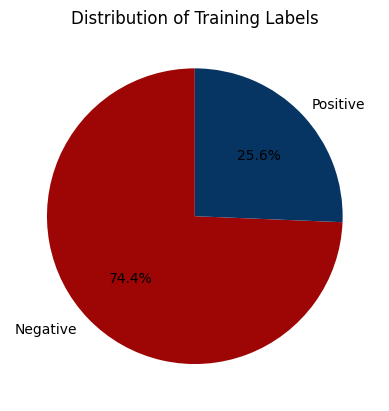

In [61]:
# Using SMOTE

plt.pie(
    y_train.value_counts(),
    labels=['Negative', 'Positive'],
    autopct='%1.1f%%',
    startangle=90,
    colors=["#9e0505", "#063564"]
)
plt.title('Distribution of Training Labels')
plt.show()

## Handle Imbalanced Dataset

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9422, 1154) (9422,)


In [63]:
y_train_smote.value_counts()

label
1    4711
0    4711
Name: count, dtype: int64

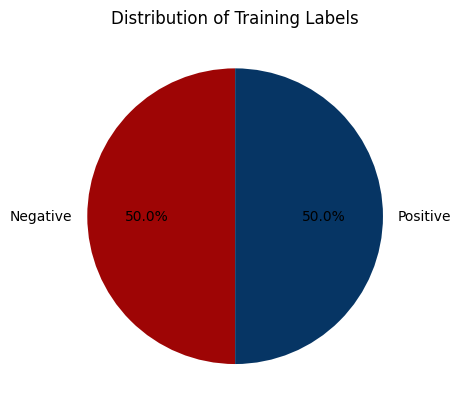

In [64]:
plt.pie(
    y_train_smote.value_counts(),
    labels=['Negative', 'Positive'],
    autopct='%1.1f%%',
    startangle=90,
    colors=["#9e0505", "#063564"]
)
plt.title('Distribution of Training Labels')
plt.show()

## Model Training & Evaluation

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 2)
    pr = round(precision_score(y_act, y_pred), 2)
    rec = round(recall_score(y_act, y_pred), 2)
    f1 = round(f1_score(y_act, y_pred), 2)

    print(f'Training Scores:\nAccuracy: {acc}\nPrecision: {pr}\nRecall: {rec}\nF1-Score: {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    pr = round(precision_score(y_test, y_pred), 2)
    rec = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    
    print(f'Validation Scores:\nAccuracy: {acc}\nPrecision: {pr}\nRecall: {rec}\nF1-Score: {f1}')

## Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [68]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [69]:
train_scores(y_train_smote, y_train_pred)

Training Scores:
Accuracy: 0.94
Precision: 0.92
Recall: 0.96
F1-Score: 0.94


In [70]:
y_test_pred = lr.predict(vectorized_x_test)

In [71]:
validation_scores(y_test, y_test_pred)

Validation Scores:
Accuracy: 0.87
Precision: 0.7
Recall: 0.86
F1-Score: 0.77


## Multinomial Naive Bayes

In [72]:
nb = MultinomialNB()
nb.fit(vectorized_x_train_smote, y_train_smote)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
